# Imports

In [1]:
import math

import cv2
from matplotlib import pyplot as plt

from ultralytics import YOLO

In [2]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=300)

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

# YOLOv8

In [3]:
model = YOLO("best.pt")

In [13]:
img_path = 'diagrams/employee_inher.jpg'

In [14]:
image = cv2.imread(img_path)

In [15]:
result = model.predict(image)[0]
result

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([4, 6])
dtype: torch.float32
 + tensor([[4.62000e+02, 1.02800e+03, 1.74000e+03, 1.39700e+03, 9.05445e-01, 0.00000e+00],
        [4.65000e+02, 8.05000e+02, 1.02200e+03, 9.87000e+02, 7.71217e-01, 0.00000e+00],
        [4.66000e+02, 1.03800e+03, 5.41000e+02, 1.10100e+03, 5.59923e-01, 1.00000e+00],
        [4.70000e+02, 9.01000e+02, 5.42000e+02, 9.72000e+02, 2.74291e-01, 1.00000e+00]], device='cuda:0')

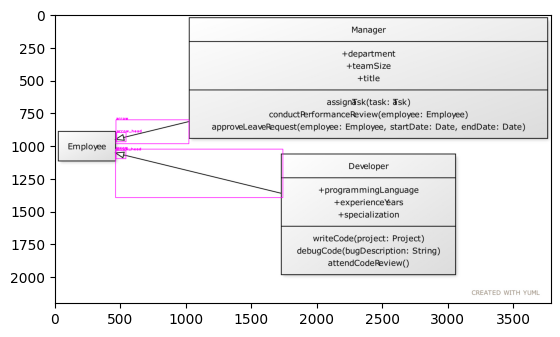

In [16]:
class_names = ['arrow', 'arrow_head']

boxes = result.boxes

for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 3)

    confidence = math.ceil((box.conf[0]*100))/100
    label = class_names[int(box.cls[0])]

    cv2.putText(image, label, org=[x1, y1], fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 255), thickness=4)

plt.imshow(image)
plt.show()

In [18]:
def get_coordinates(model, image, classes):
    coords = []
    result = model.predict(image)[0]
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        conf = math.ceil((box.conf[0]*100))/100
        label = classes[int(box.cls[0])]
        coords.append([(x1, y1), (x2, y2), conf, label])
    return coords

In [20]:
get_coordinates(model, image, class_names)

[[(481, 1044), (1728, 1385), 0.74, 'arrow'],
 [(468, 813), (1027, 994), 0.62, 'arrow'],
 [(469, 1045), (544, 1103), 0.28, 'arrow_head'],
 [(1720, 1553), (3083, 1653), 0.26, 'arrow']]